<a href="https://colab.research.google.com/github/abdullahubaids/UTS-Praktikum-Pembelajaran-Mesin---1197050002---Abdullah-Ubaid-Salim---Kelas-B/blob/main/1197050002_AbdullahUbaidSalim_UTSPPM_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       988
           1       0.93      0.91      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



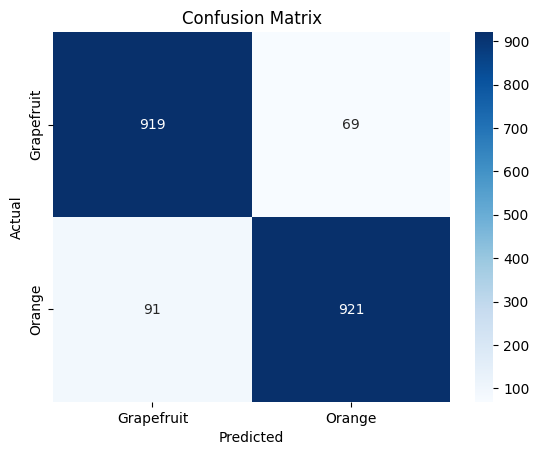

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/UTS PPM/citrus.csv'
df = pd.read_csv(file_path)

data = df
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])  # orange = 0, grapefruit = 1


scaler = MinMaxScaler()
numerical_cols = ['diameter', 'weight', 'red', 'green', 'blue']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


X = data.drop('name', axis=1)
y = data['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GaussianNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Grapefruit', 'Orange'], yticklabels=['Grapefruit', 'Orange'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()